In [1]:
import os
import warnings
warnings.filterwarnings(action='ignore')

if os.getcwd() == '/content':
    data_path = '/content/drive/MyDrive/Colab Notebooks/datasets'
else:
    data_path = r'G:\내 드라이브\Colab Notebooks\datasets'

# Perceptron

## Single-layer Perceptron

In [2]:
def AND_gate(x1, x2):
    w1, w2, b = 0.5, 0.5, -0.7
    result = x1*w1 + x2*w2 + b
    
    if result <= 0:
        return 0
    else:
        return 1

In [3]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [4]:
def NAND_gate(x1, x2):
    w1, w2, b = -0.5, -0.5, 0.7
    result = x1*w1 + x2*w2 + b
    
    if result <= 0:
        return 0
    else:
        return 1

In [5]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [6]:
def OR_gate(x1, x2):
    w1, w2, b = 0.6, 0.6, -0.5
    result = x1*w1 + x2*w2 + b
    
    if result <= 0:
        return 0
    else:
        return 1

In [7]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

# XOR - Single-layer Perceptron

In [8]:
import torch
from torch import nn
from torch import optim

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

seed = 42
torch.manual_seed(seed)
if device == 'cuda':
    torch.cuda.manual_seed_all(seed)

In [10]:
x = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

x.size(), y.size()

(torch.Size([4, 2]), torch.Size([4, 1]))

In [11]:
linear = nn.Linear(in_features=2, out_features=1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

loss_fn = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    pred = model(x)
    loss = loss_fn(pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step % 1000 == 0:
        print(f'[epoch {step:>5d}/10000] {loss.item()}')

[epoch     0/10000] 0.7317379713058472
[epoch  1000/10000] 0.6931471824645996
[epoch  2000/10000] 0.6931471824645996
[epoch  3000/10000] 0.6931471824645996
[epoch  4000/10000] 0.6931471824645996
[epoch  5000/10000] 0.6931471824645996
[epoch  6000/10000] 0.6931471824645996
[epoch  7000/10000] 0.6931471824645996
[epoch  8000/10000] 0.6931471824645996
[epoch  9000/10000] 0.6931471824645996
[epoch 10000/10000] 0.6931471824645996


In [12]:
with torch.no_grad():
    pred = model(x)
    y_pred = (pred > 0.5).float()
    correct = (y_pred == y).float()
    accuracy = correct.mean()
    
    print(f'pred\n {pred.detach().cpu().numpy()}\n')
    print(f'y_pred\n {y_pred.detach().cpu().numpy()}\n')
    print(f'y\n {y.cpu().numpy()}\n')
    print(f'accuracy : {accuracy.item()}')

pred
 [[0.5]
 [0.5]
 [0.5]
 [0.5]]

y_pred
 [[0.]
 [0.]
 [0.]
 [0.]]

y
 [[0.]
 [1.]
 [1.]
 [0.]]

accuracy : 0.5


# XOR - MLP

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
seed = 42

torch.manual_seed(seed)
if device == 'cuda':
    torch.cuda.manual_seed_all(seed)

In [15]:
x = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

x.shape, y.shape

(torch.Size([4, 2]), torch.Size([4, 1]))

In [16]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10, bias=True),
    nn.Sigmoid(),
    nn.Linear(in_features=10, out_features=10, bias=True),
    nn.Sigmoid(),
    nn.Linear(in_features=10, out_features=10, bias=True),
    nn.Sigmoid(),
    nn.Linear(in_features=10, out_features=1, bias=True),
    nn.Sigmoid(),
).to(device)

loss_fn = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

for epoch in range(10001):
    pred = model(x)
    loss = loss_fn(pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(f'[epoch {epoch:>5d}/10000] loss : {loss.item()}')

[epoch     0/10000] loss : 0.6953549385070801
[epoch  1000/10000] loss : 0.6931273341178894
[epoch  2000/10000] loss : 0.6930989027023315
[epoch  3000/10000] loss : 0.6929996609687805
[epoch  4000/10000] loss : 0.6912369132041931
[epoch  5000/10000] loss : 0.0016472291899845004
[epoch  6000/10000] loss : 0.0005045335274189711
[epoch  7000/10000] loss : 0.00028991492581553757
[epoch  8000/10000] loss : 0.00020146936003584415
[epoch  9000/10000] loss : 0.00015368765161838382
[epoch 10000/10000] loss : 0.00012385132140479982


In [17]:
with torch.no_grad():
    pred = model(x)
    y_pred = (pred > 0.5).float()
    acc = (y_pred == y).float().mean()
    
    print(f'pred\n {pred.detach().cpu().numpy()}\n')
    print(f'y_pred\n {y_pred.detach().cpu().numpy()}\n')
    print(f'y\n {y.cpu().numpy()}\n')
    print(f'accuracy : {acc.item()}')

pred
 [[1.38787451e-04]
 [9.99866605e-01]
 [9.99878526e-01]
 [1.01692174e-04]]

y_pred
 [[0.]
 [1.]
 [1.]
 [0.]]

y
 [[0.]
 [1.]
 [1.]
 [0.]]

accuracy : 1.0


# Activation Function

In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid Function

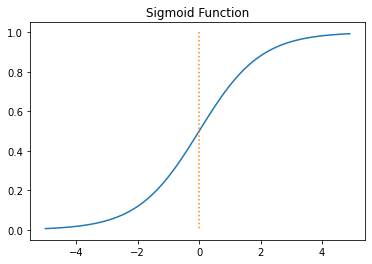

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

## Tanh Function

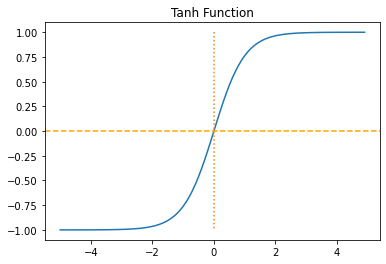

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, -1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

## ReLU

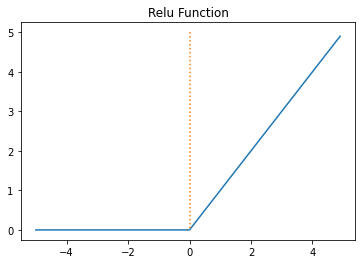

In [21]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0],[5.0, 0.0], ':')
plt.title('Relu Function')
plt.show()

## Leaky ReLU

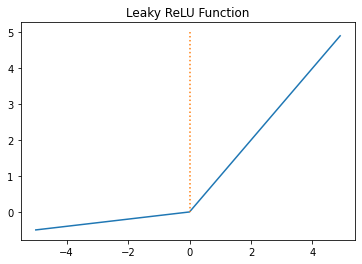

In [22]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0, 0],[5.0, 0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

## Softmax

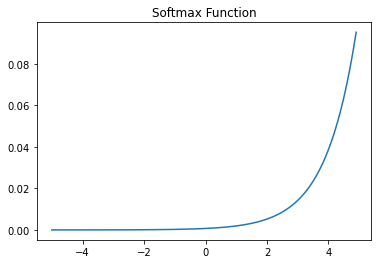

In [23]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

## out layer funcion

In [24]:
# binary : sigmoid / nn.BCELoss()
# multi-class : softmax / nn.CrossEntropyLoss()
# regression : x / nn.MSELoss()

# Digits

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

In [26]:
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


In [27]:
len(digits.images)

1797

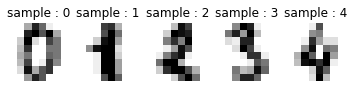

In [28]:
for idx, (image, label) in enumerate(zip(digits.images, digits.target)):
    plt.subplot(2, 5, idx+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'sample : {label}')
    
    if idx == 4:
        break

In [29]:
digits.data[0].shape

(64,)

In [30]:
x = digits.data
y = digits.target

x.shape, y.shape

((1797, 64), (1797,))

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

In [32]:
x = torch.tensor(x.copy(), dtype=torch.float32)
y = torch.tensor(y.copy(), dtype=torch.int64)

model = nn.Sequential(
    nn.Linear(in_features=64, out_features=32),
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=10),
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

losses = []

for epoch in range(101):
    pred = model(x)
    loss = loss_fn(pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'[epoch {epoch:>3d}/100] loss : {loss.item():>6f}')
    
    losses.append(loss.item())

[epoch   0/100] loss : 2.644701
[epoch  10/100] loss : 2.094831
[epoch  20/100] loss : 1.800173
[epoch  30/100] loss : 1.489776
[epoch  40/100] loss : 1.167534
[epoch  50/100] loss : 0.878932
[epoch  60/100] loss : 0.662835
[epoch  70/100] loss : 0.510619
[epoch  80/100] loss : 0.402007
[epoch  90/100] loss : 0.323116
[epoch 100/100] loss : 0.265719


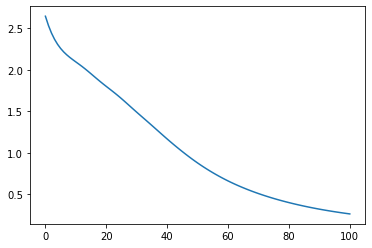

In [33]:
plt.plot(losses)
plt.show()

# MNIST

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets
from torchvision import transforms

In [35]:
mnist = fetch_openml(name='mnist_784', version=1, cache=True)

In [36]:
mnist.data.values.shape

(70000, 784)

In [37]:
x = mnist.data.values / 255
y = mnist.target.astype(np.int8).values

In [38]:
x[0].shape, y[0]

((784,), 5)

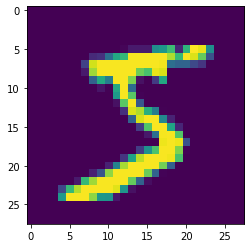

In [39]:
plt.imshow(x[0].reshape(28, -1))

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/7, random_state=0)

x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(x_train, y_train)
ds_test = TensorDataset(x_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [41]:
def build_model():
    model = nn.Sequential()
    model.add_module(name='fc1', module=nn.Linear(in_features=28*28*1, out_features=100))
    model.add_module(name='relu1', module=nn.ReLU())
    model.add_module(name='fc2', module=nn.Linear(in_features=100, out_features=100))
    model.add_module(name='relu2', module=nn.ReLU())
    model.add_module(name='fc3', module=nn.Linear(in_features=100, out_features=10))
    return model

In [42]:
model = build_model()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train_loop(epoch):
    model.train()
    
    for batch, (x, y) in enumerate(loader_train):
        pred = model(x)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'[epoch {epoch+1:>2d}] loss : {loss:>7f}')

def test_loop():
    model.eval()
    correct = 0
    
    with torch.no_grad():
        for x, y in loader_test:
            pred = model(x)
            _, y_pred = torch.max(pred.data, 1)
            correct += y_pred.eq(y.data.view_as(y_pred)).sum()
    
    data_num = len(loader_test.dataset)
    print(f'[test] accuracy : {(100*correct / data_num):>1f}%')

for epoch in range(5):
    train_loop(epoch)

test_loop()

[epoch  1] loss : 0.162237
[epoch  2] loss : 0.008297
[epoch  3] loss : 0.193541
[epoch  4] loss : 0.003432
[epoch  5] loss : 0.008071
[test] accuracy : 96.349998%


tensor(2)


Text(0.5, 1.0, 'tensor(2)')

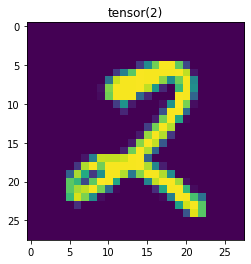

In [43]:
index = 2018

model.eval()
data = x_test[index]

output = model(data)
_, predicted = torch.max(output.data, 0)

print(predicted)

x_test_show = x_test[index].numpy()
plt.imshow(x_test_show.reshape(28, 28))
plt.title(y_test[index])

In [44]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.MNIST(
    root=data_path,
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root=data_path,
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [45]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [46]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.305951  [    0/60000]
loss: 2.296981  [ 6400/60000]
loss: 2.287800  [12800/60000]
loss: 2.287164  [19200/60000]
loss: 2.284097  [25600/60000]
loss: 2.279024  [32000/60000]
loss: 2.270184  [38400/60000]
loss: 2.283634  [44800/60000]
loss: 2.260162  [51200/60000]
loss: 2.247626  [57600/60000]
Test Error: 
 Accuracy: 28.8%, Avg loss: 2.256179 

Epoch 2
-------------------------------
loss: 2.260706  [    0/60000]
loss: 2.248423  [ 6400/60000]
loss: 2.249637  [12800/60000]
loss: 2.229023  [19200/60000]
loss: 2.235335  [25600/60000]
loss: 2.228350  [32000/60000]
loss: 2.210311  [38400/60000]
loss: 2.235305  [44800/60000]
loss: 2.198619  [51200/60000]
loss: 2.181254  [57600/60000]
Test Error: 
 Accuracy: 59.0%, Avg loss: 2.190505 

Epoch 3
-------------------------------
loss: 2.196996  [    0/60000]
loss: 2.175276  [ 6400/60000]
loss: 2.188854  [12800/60000]
loss: 2.139688  [19200/60000]
loss: 2.159269  [25600/60000]
loss: 2.146863  [32000/600